#Robust-Yield-Prediction-on-various-Farm-Processing-Units

**Problem Description:**
 A new fast-food chain is seeing rapid expansion over the past couple of years. They are now trying to optimize their supply chain to ensure that there are no shortages of ingredients. For this, they’ve tasked the data science team to come up with a model that could predict the output of each food processing farm over the next few years. These predictions could further increase the efficiency of their current supply chain management systems

**Objectives:** 

1.   Explore the data and engieer new features.
2.   Predict the yield for each farm during the given timestamps.
3.   Given the forecasted demand for the next few months for a particular ingredient, device a strategy to source it, creating a strategy to source 'ing_w' ingredient type.

**The approach for solving the problem.**

1.   Define the problem: Understand the business problem and clearly define the objective of the project. This includes defining the problem statement, identifying the target variable.There are 5  datasets provided in this competition. The datasets consist of Crop Information mainly around different types of ingredients, Farm Data and Field Management Information and also consists information of the weather data provided by timestamp.
2.   Explore the data: Perform exploratory data analysis (EDA) to understand the data, its distribution, and any patterns that may exist. This will help in identifying any anomalies or missing data that need to be cleaned.
3.   Data cleaning and preprocessing: Prepare the data for modeling by cleaning and preprocessing it. This includes handling missing values, outliers, and dealing with categorical variables.
4.   Feature engineering: Create new features or transform existing ones to improve the performance of the model.
5.   Model selection: Select the appropriate model that can best solve the problem. This may involve trying multiple algorithms and selecting the one with the highest accuracy.
6.   Train the model: Split the data into training and validation sets, and train the model on the training set. This includes tuning the hyperparameters of the model and using techniques like cross-validation to avoid overfitting.
7.   Evaluate the model: Evaluate the performance of the model on the validation set. This includes calculating metrics like RMSE.
8.   Predictions on the Test Data.
9.   Conclusion.

***I have split this Colab notebook into two parts: the first part covers EDA, data cleaning, preprocessing, and feature engineering; while the second part covers model selection, training, evaluation, and predictions on the test data. This has been done to address memory issues that arise from running all the tasks in a single notebook.***























#Explore the data

Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Datasets from the given path

In [ ]:
df_train=pd.read_csv("train_data.csv")
df_fram=pd.read_csv("farm_data-1646897931981.csv")
df_whe=pd.read_csv("train_weather-1646897968670.csv")
print(df_train.shape)
print(df_whe.shape)
print(df_fram.shape)

(20216100, 4)
(139773, 9)
(1449, 6)


In [ ]:

df_train.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [ ]:
df_train.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [ ]:
df_fram.describe()

,operations_commencing_year,num_processing_plants,farm_area
count,675.000000,355.000000,1449.000000
mean,1967.957037,7.740845,8557.460363
std,31.054030,3.333683,10290.860757
min,1900.000000,5.000000,26.291549
25%,1949.000000,5.000000,2137.883836
50%,1970.000000,7.000000,5357.994719
75%,1995.000000,9.000000,10746.647428
max,2017.000000,30.000000,81290.125000


In [ ]:
df_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   farm_id                     1449 non-null   object 
 1   operations_commencing_year  675 non-null    float64
 2   num_processing_plants       355 non-null    float64
 3   farm_area                   1449 non-null   float64
 4   farming_company             1449 non-null   object 
 5   deidentified_location       1449 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.0+ KB


In [ ]:
df_fram.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [ ]:
df_whe.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [ ]:
df_whe.describe()

,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139718.000000,70600.000000,133505.000000,139660.000000,129155.000000,89484.000000,139469.000000
mean,14.418106,2.149306,180.526632,7.350158,1016.158038,0.983047,3.560527
std,10.626595,2.599150,111.523629,9.790235,7.629684,8.463678,2.335874
min,-28.900000,0.000000,0.000000,-35.000000,968.200000,-1.000000,0.000000
25%,7.200000,0.000000,80.000000,0.600000,1011.800000,0.000000,2.100000
50%,15.000000,2.000000,190.000000,8.300000,1016.400000,0.000000,3.100000
75%,22.200000,4.000000,280.000000,14.400000,1020.800000,0.000000,5.000000
max,47.200000,9.000000,360.000000,26.100000,1045.500000,343.000000,19.000000


In [ ]:
df_whe.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [ ]:
df_whe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              139773 non-null  object 
 1   deidentified_location  139773 non-null  object 
 2   temp_obs               139718 non-null  float64
 3   cloudiness             70600 non-null   float64
 4   wind_direction         133505 non-null  float64
 5   dew_temp               139660 non-null  float64
 6   pressure_sea_level     129155 non-null  float64
 7   precipitation          89484 non-null   float64
 8   wind_speed             139469 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.6+ MB


In [ ]:
df_fram.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [ ]:
df_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   farm_id                     1449 non-null   object 
 1   operations_commencing_year  675 non-null    float64
 2   num_processing_plants       355 non-null    float64
 3   farm_area                   1449 non-null   float64
 4   farming_company             1449 non-null   object 
 5   deidentified_location       1449 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.0+ KB


In [ ]:
df_fram.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

**Merging the df_train and df_fram datasets.**

In [ ]:
df=df_train.merge(df_fram,on='farm_id') # merging train and farm data based on farm_id
df.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369


In [ ]:
df.describe() #describe the merged data

,yield,operations_commencing_year,num_processing_plants,farm_area
count,2.060290e+07,8.251866e+06,3.607665e+06,2.060290e+07
mean,2.085573e+03,1.967987e+03,8.193469e+00,9.944581e+03
std,1.517908e+05,3.026668e+01,3.973209e+00,1.085455e+04
min,0.000000e+00,1.900000e+03,5.000000e+00,2.629155e+01
25%,1.804700e+01,1.951000e+03,5.000000e+00,2.992034e+03
50%,7.771000e+01,1.969000e+03,7.000000e+00,6.683070e+03
75%,2.657500e+02,1.993000e+03,1.000000e+01,1.280259e+04
max,2.190470e+07,2.017000e+03,3.000000e+01,8.129012e+04


In [ ]:
df.info() #info of merged data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20602899 entries, 0 to 20602898
Data columns (total 9 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   yield                       float64
 4   operations_commencing_year  float64
 5   num_processing_plants       float64
 6   farm_area                   float64
 7   farming_company             object 
 8   deidentified_location       object 
dtypes: float64(4), object(5)
memory usage: 1.5+ GB


In [ ]:
df.shape #after merging shape of the data

(20602899, 9)

In [ ]:
df.isnull().sum() #checking there is any null values in merge data

date                                 0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12351033
num_processing_plants         16995234
farm_area                            0
farming_company                      0
deidentified_location                0
dtype: int64

In [ ]:
#rename the timestamp to data
df_whe.rename(columns={'timestamp':'date'},inplace=True)
# df_whe.info()

Merging the df and df_whe datasets.

In [ ]:
train_df=df.merge(df_whe,on=['deidentified_location','date'],how='inner') ## merging df and df_whe data based on 'deidentified_location','date'.
train_df.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,1975.0,NaN,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [ ]:
train_df.info() #info of merged data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20511532 entries, 0 to 20511531
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   yield                       float64
 4   operations_commencing_year  float64
 5   num_processing_plants       float64
 6   farm_area                   float64
 7   farming_company             object 
 8   deidentified_location       object 
 9   temp_obs                    float64
 10  cloudiness                  float64
 11  wind_direction              float64
 12  dew_temp                    float64
 13  pressure_sea_level          float64
 14  precipitation               float64
 15  wind_speed                  float64
dtypes: float64(11), object(5)
memory usage: 2.6+ GB


In [ ]:
train_df.shape

(20511532, 16)

In [ ]:
train_df.describe()

,yield,operations_commencing_year,num_processing_plants,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,2.051153e+07,8.175255e+06,3.596180e+06,2.051153e+07,2.050529e+07,1.160664e+07,1.913524e+07,2.050177e+07,1.932460e+07,1.678142e+07,2.045786e+07
mean,2.093066e+03,1.968051e+03,8.184316e+00,9.944728e+03,1.597545e+01,1.908760e+00,1.731990e+02,7.741475e+00,1.016085e+03,7.939866e-01,3.384471e+00
std,1.521284e+05,3.026667e+01,3.958037e+00,1.085629e+04,1.094055e+01,2.405981e+00,1.140037e+02,1.016791e+01,7.057181e+00,7.454137e+00,2.268121e+00
min,0.000000e+00,1.900000e+03,5.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,0.000000e+00,-3.500000e+01,9.682000e+02,-1.000000e+00,0.000000e+00
25%,1.805000e+01,1.951000e+03,5.000000e+00,2.992034e+03,8.600000e+00,0.000000e+00,8.000000e+01,0.000000e+00,1.011600e+03,0.000000e+00,2.100000e+00
50%,7.768000e+01,1.969000e+03,7.000000e+00,6.683070e+03,1.670000e+01,0.000000e+00,1.800000e+02,8.900000e+00,1.016000e+03,0.000000e+00,3.100000e+00
75%,2.656250e+02,1.993000e+03,1.000000e+01,1.280259e+04,2.390000e+01,4.000000e+00,2.800000e+02,1.600000e+01,1.020500e+03,0.000000e+00,4.600000e+00
max,2.190470e+07,2.017000e+03,3.000000e+01,8.129012e+04,4.720000e+01,9.000000e+00,3.600000e+02,2.610000e+01,1.045500e+03,3.430000e+02,1.900000e+01


#Visualizations

<AxesSubplot:xlabel='ingredient_type', ylabel='count'>

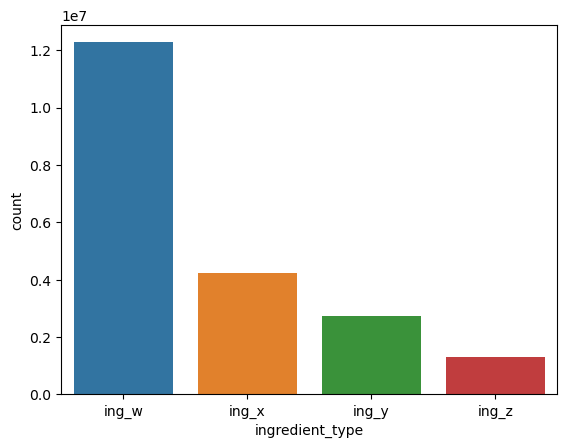

In [ ]:
# Observing ingredient type variable counts through bargraph
sns.countplot(x='ingredient_type',data=train_df)

Countpolt is useful for visualizing the distribution of categorical data and identifying the most frequent categories. 

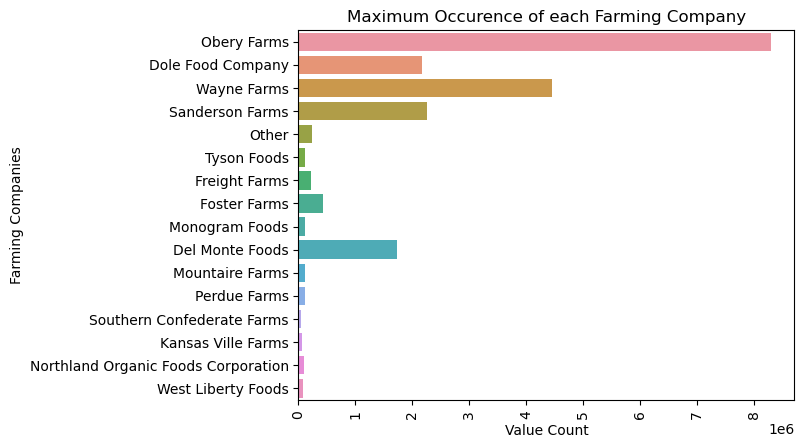

In [ ]:
sns.countplot(y="farming_company", data= train_df) #count plot each farming company
plt.title("Maximum Occurence of each Farming Company")
plt.ylabel("Farming Companies")
plt.xlabel("Value Count")
plt.xticks(rotation=90)
plt.show()

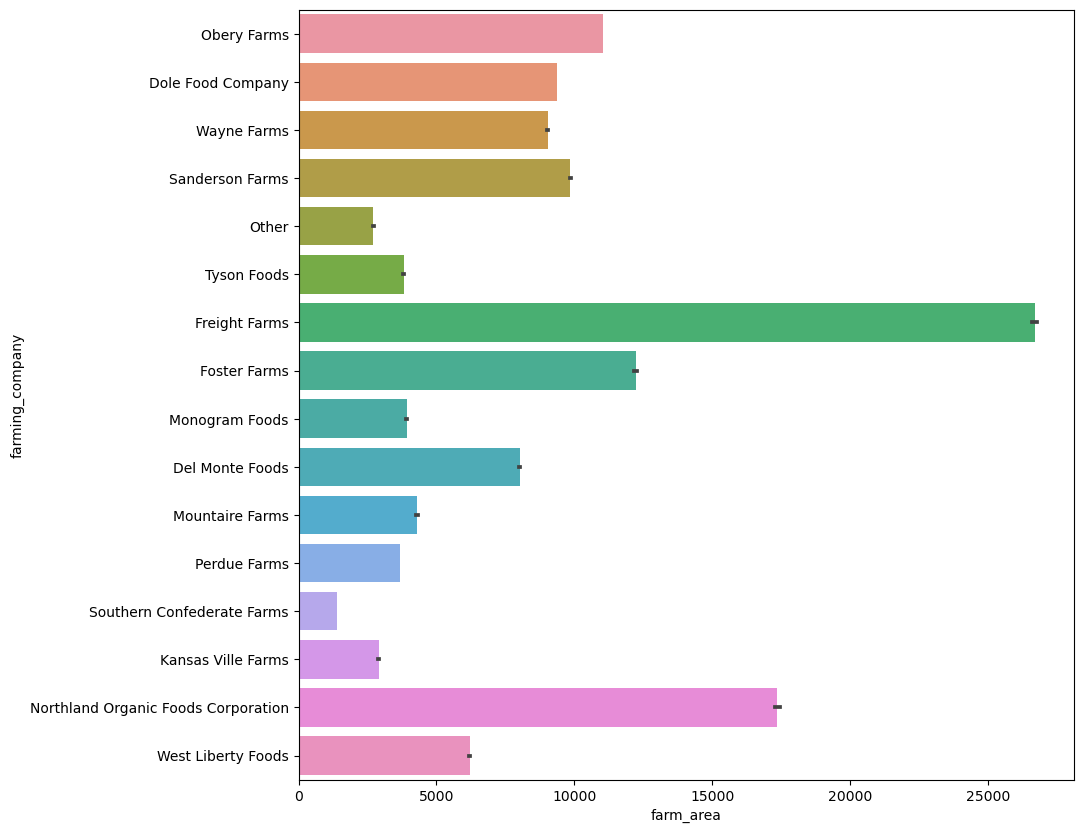

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y = 'farming_company',x = 'farm_area',data = train_df)
plt.show()

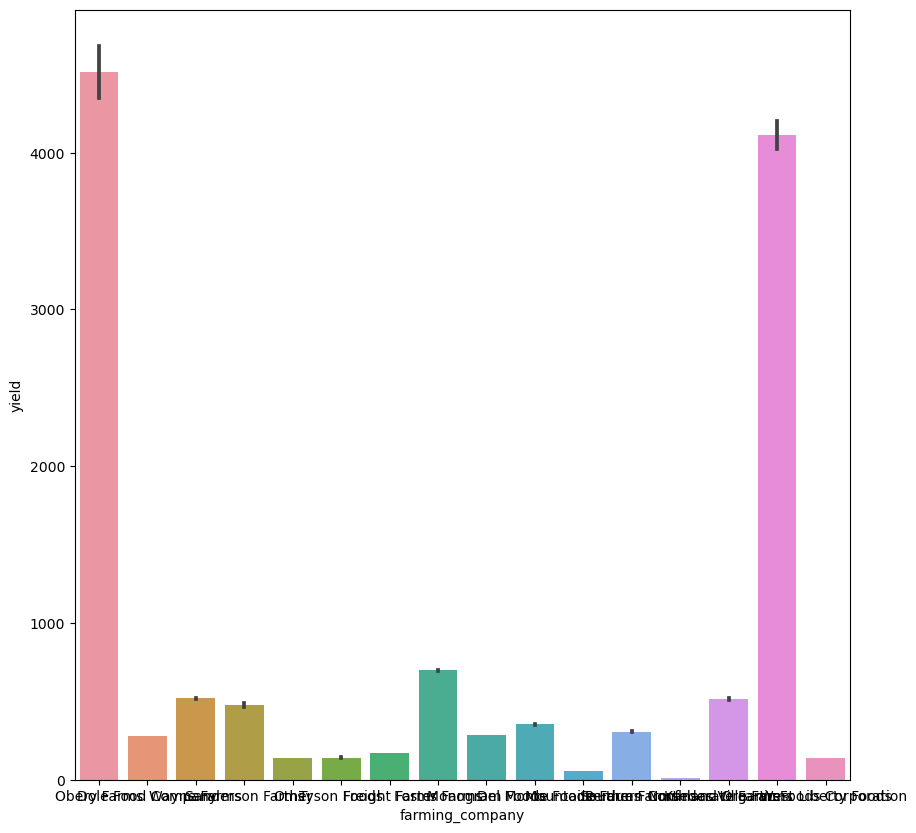

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'farming_company',y = 'yield',data = train_df)
plt.show()

Based on the objective, using the forecasted demand for the next few months for a specific ingredient, a strategy needs to be developed to source the ingredient type 'ing_w'.

In [ ]:
train=train_df.groupby('ingredient_type').get_group('ing_w')
train.shape

(12269895, 16)

In [ ]:
train.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01,fid_17537,ing_w,0.0,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01,fid_110392,ing_w,0.0,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01,fid_62402,ing_w,0.0,1975.0,NaN,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [ ]:
train['ingredient_type'].value_counts()

ing_w    12269895
Name: ingredient_type, dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20511532 entries, 0 to 20511531
Data columns (total 16 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date                        datetime64[ns]
 1   farm_id                     object        
 2   ingredient_type             object        
 3   yield                       float64       
 4   operations_commencing_year  float64       
 5   num_processing_plants       float64       
 6   farm_area                   float64       
 7   farming_company             object        
 8   deidentified_location       object        
 9   temp_obs                    float64       
 10  cloudiness                  float64       
 11  wind_direction              float64       
 12  dew_temp                    float64       
 13  pressure_sea_level          float64       
 14  precipitation               float64       
 15  wind_speed                  float64       
dtypes: datetime64[ns

In [ ]:
train_df.isnull().sum()

date                                 0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12336277
num_processing_plants         16915352
farm_area                            0
farming_company                      0
deidentified_location                0
temp_obs                          6242
cloudiness                     8904896
wind_direction                 1376296
dew_temp                          9763
pressure_sea_level             1186931
precipitation                  3730108
wind_speed                       53672
dtype: int64

Outiers Treatment


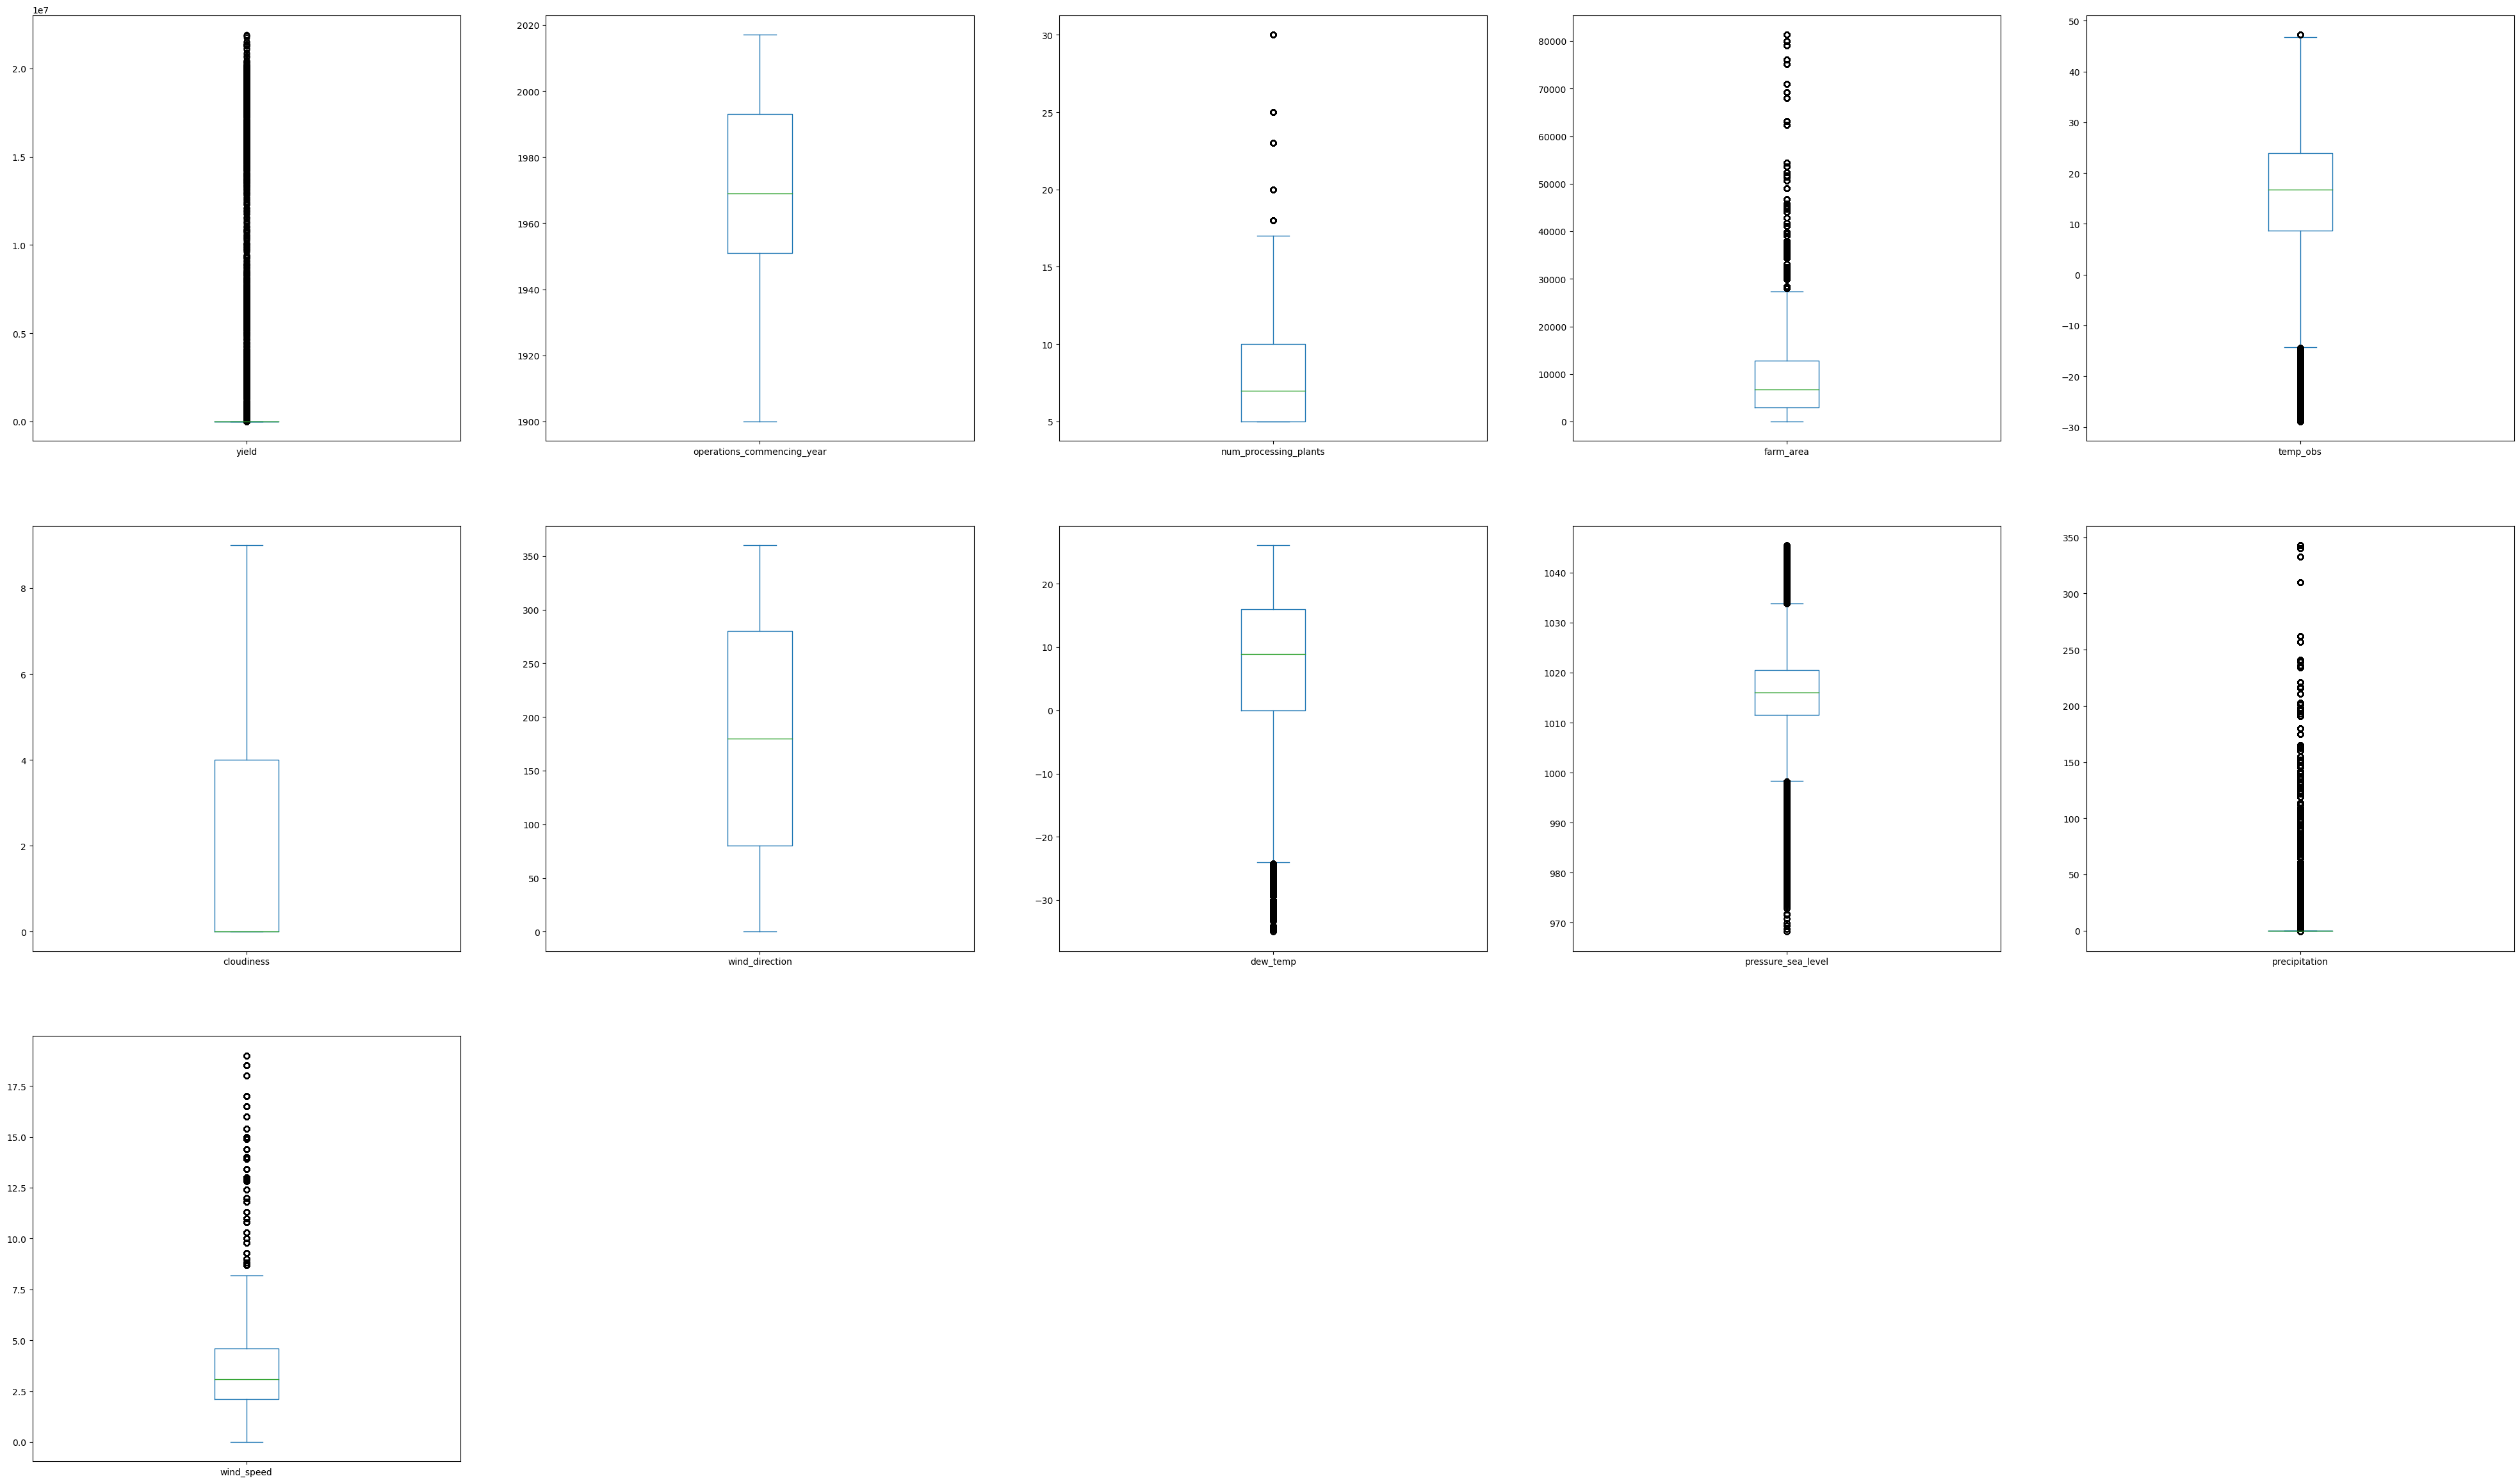

In [ ]:
train_df.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

It is observed that there are outliers in some columns

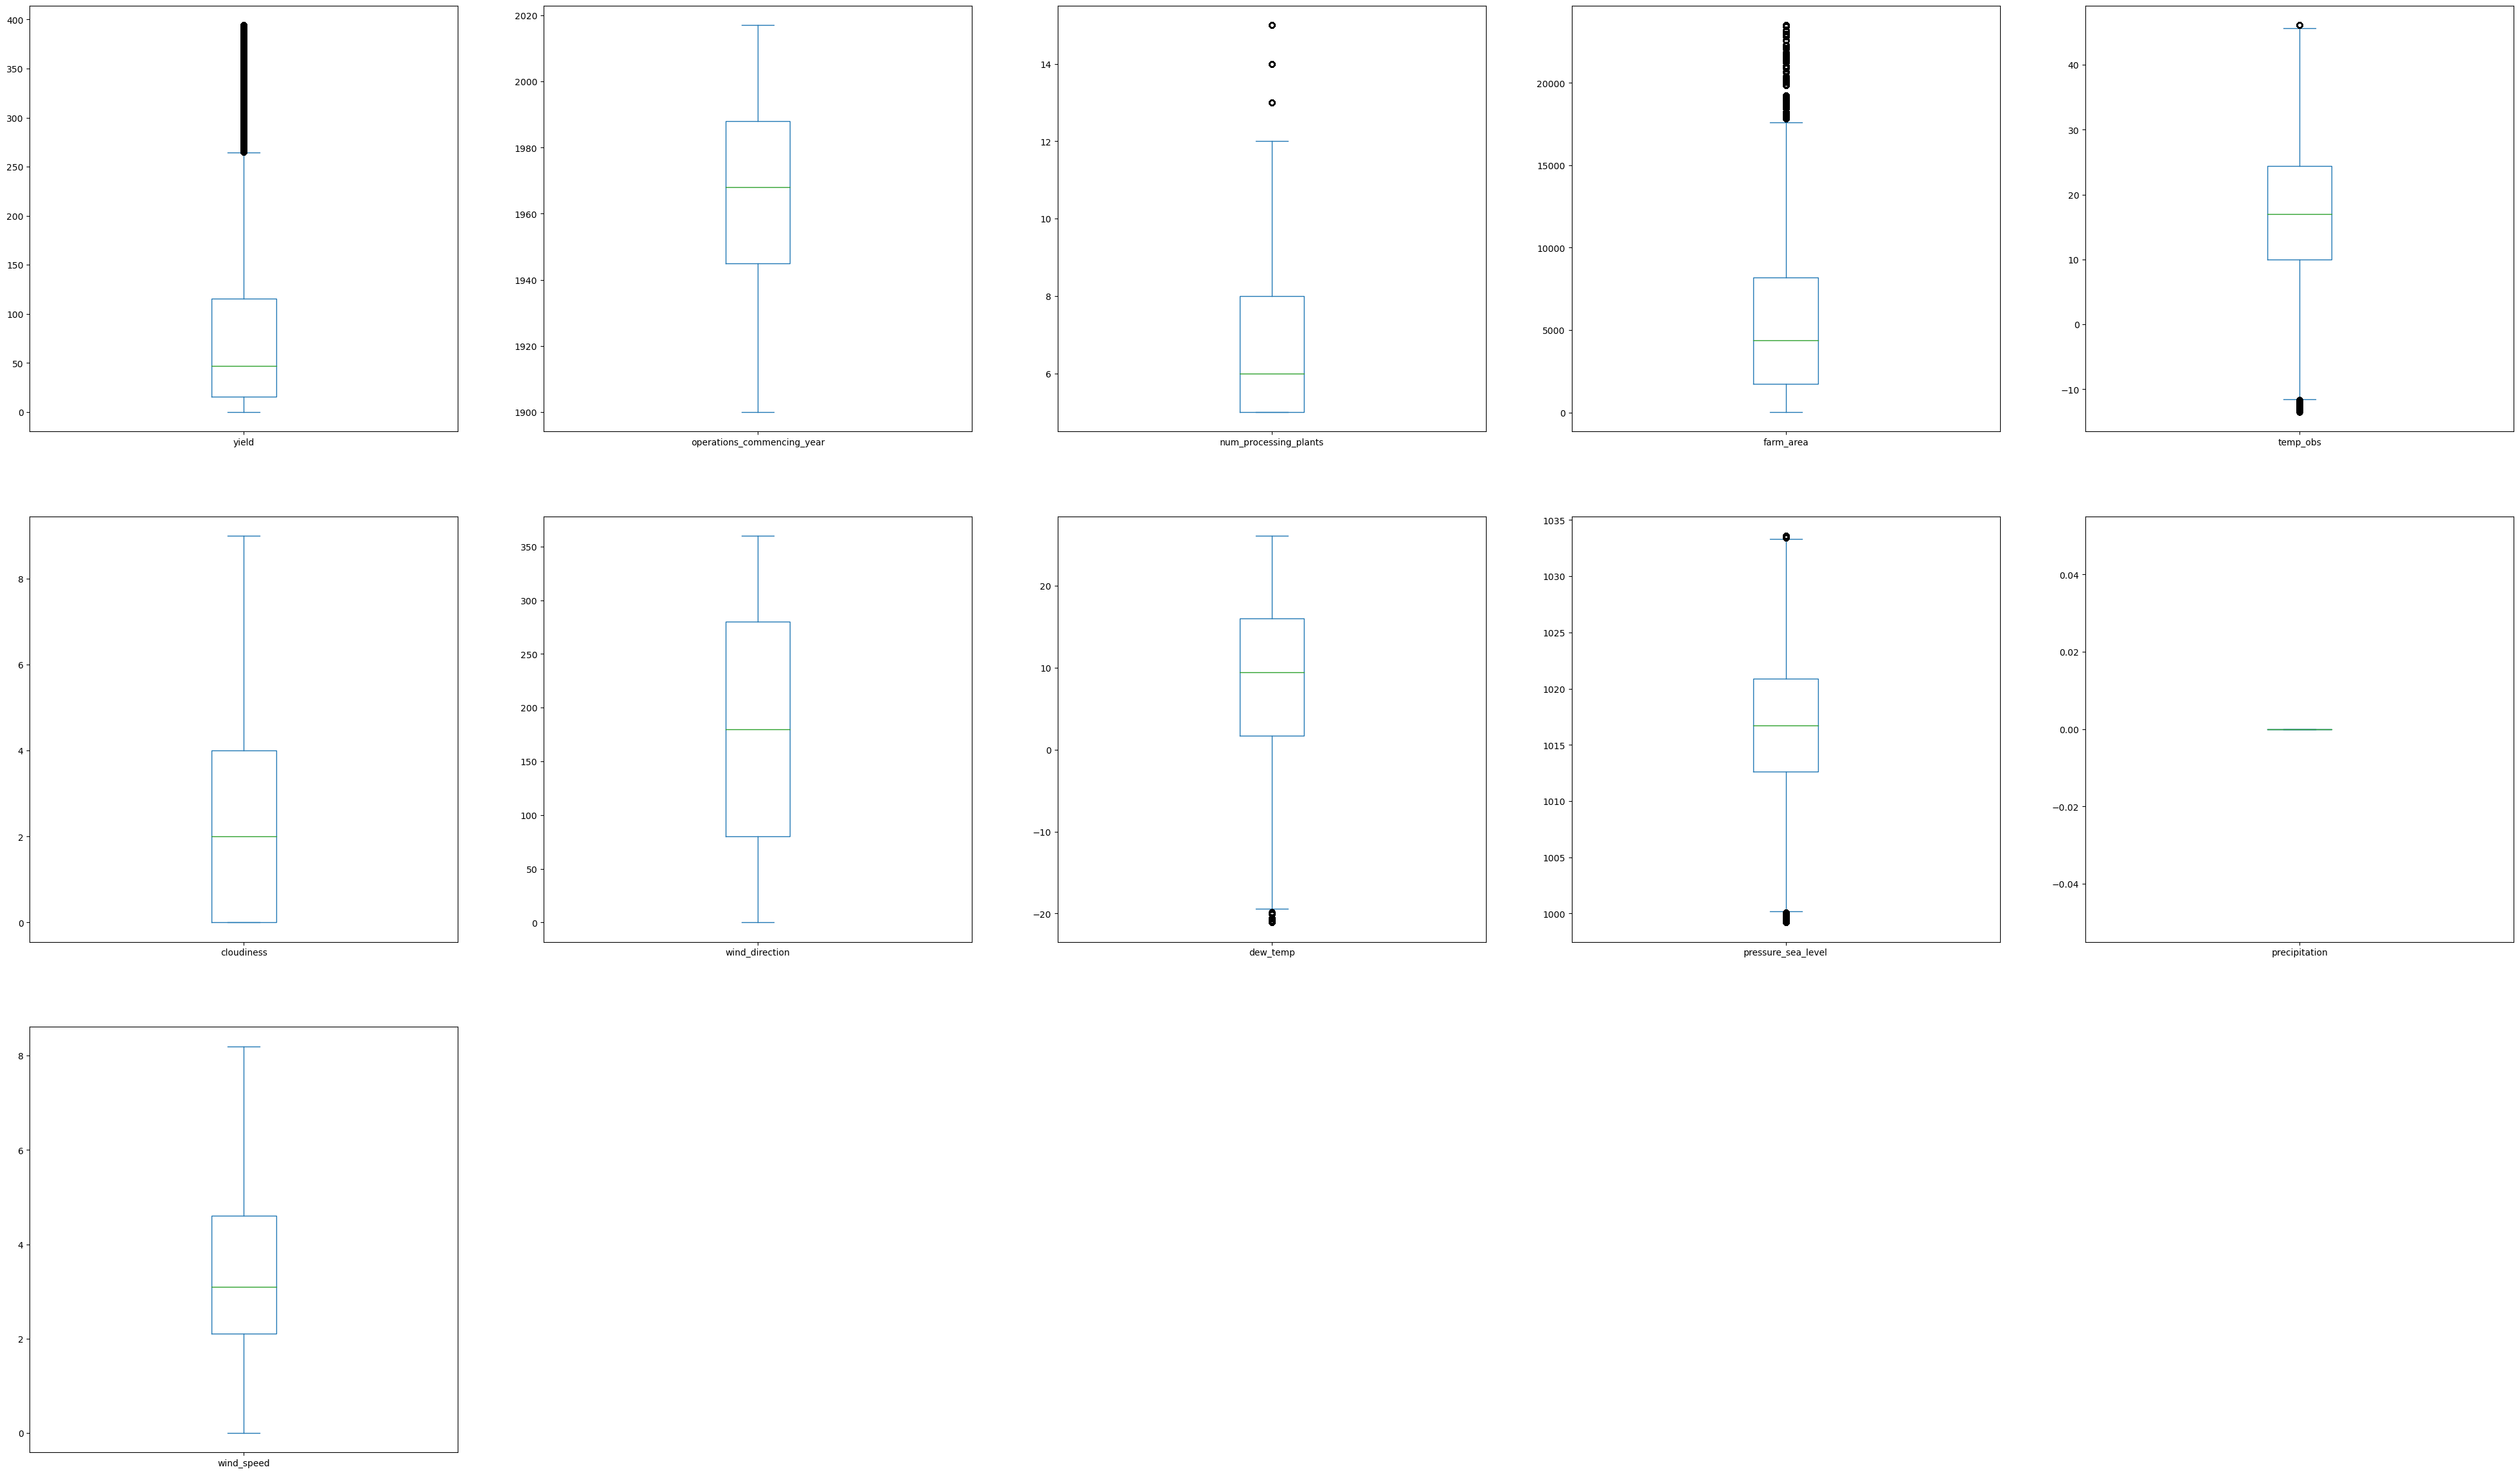

In [ ]:
#Removing the outliers
cols=['yield','num_processing_plants','farm_area','dew_temp','temp_obs','pressure_sea_level','precipitation','wind_speed']
q1=train[cols].quantile(0.25)
q3=train[cols].quantile(0.75)
iqr=q3-q1
train_df_box=train[~((train[cols]<(q1 -1.5*iqr)) |(train[cols]>(q3 +1.5*iqr))).any(axis=1)]
train_df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

It appears that despite treating for outliers, some outliers are still present.

Separating Numerical and categorical columns

In [ ]:
numeric=train._get_numeric_data()                             
print(numeric.info())
numeric.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12269895 entries, 0 to 20511529
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   yield                       float64
 1   operations_commencing_year  float64
 2   num_processing_plants       float64
 3   farm_area                   float64
 4   temp_obs                    float64
 5   cloudiness                  float64
 6   wind_direction              float64
 7   dew_temp                    float64
 8   pressure_sea_level          float64
 9   precipitation               float64
 10  wind_speed                  float64
dtypes: float64(11)
memory usage: 1.1 GB
None


(12269895, 11)

In [ ]:
cat_train=train.drop(numeric,axis=1)
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12269895 entries, 0 to 20511529
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   farm_id                object        
 2   ingredient_type        object        
 3   farming_company        object        
 4   deidentified_location  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 561.7+ MB


In [ ]:
numeric.columns

Index(['yield', 'operations_commencing_year', 'num_processing_plants',
       'farm_area', 'temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed'],
      dtype='object')

In [ ]:
num_cols=[ 'operations_commencing_year', 'num_processing_plants',
       'farm_area', 'temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed']

In [ ]:
cat_cols=['date', 'farm_id', 'ingredient_type', 'farming_company',
       'deidentified_location']

In [ ]:
numeric.isnull().sum() # checking null values

yield                               0
operations_commencing_year    6575190
num_processing_plants         9226130
farm_area                           0
temp_obs                         3870
cloudiness                    5400380
wind_direction                 644306
dew_temp                         5664
pressure_sea_level            1012047
precipitation                 2533229
wind_speed                      23520
dtype: int64

Imputing the numerical variables with median.

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='median')
m=im.fit_transform(numeric[num_cols])

In [ ]:
m.shape

(12269895, 10)

In [ ]:
numeric[num_cols]=m
numeric.head()

,yield,operations_commencing_year,num_processing_plants,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,0.0,2008.0,7.0,690.455096,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
1,0.0,2004.0,7.0,252.696160,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
2,0.0,1991.0,7.0,499.446528,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
3,0.0,2002.0,7.0,2200.407555,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
4,0.0,1975.0,7.0,10833.140121,25.0,6.0,0.0,20.0,1019.7,0.0,0.0


In [ ]:
numeric.isnull().sum()# we see that there is no null values

yield                         0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
temp_obs                      0
cloudiness                    0
wind_direction                0
dew_temp                      0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
dtype: int64

concatinating Cat_train and numeric data frames

In [ ]:
df=pd.concat([cat_train,numeric],join='inner',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12269895 entries, 0 to 20511529
Data columns (total 16 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   date                        datetime64[ns]
 1   farm_id                     object        
 2   ingredient_type             object        
 3   farming_company             object        
 4   deidentified_location       object        
 5   yield                       float64       
 6   operations_commencing_year  float64       
 7   num_processing_plants       float64       
 8   farm_area                   float64       
 9   temp_obs                    float64       
 10  cloudiness                  float64       
 11  wind_direction              float64       
 12  dew_temp                    float64       
 13  pressure_sea_level          float64       
 14  precipitation               float64       
 15  wind_speed                  float64       
dtypes: datetime64[ns

In [ ]:
df.isnull().sum()

date                          0
farm_id                       0
ingredient_type               0
farming_company               0
deidentified_location         0
yield                         0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
temp_obs                      0
cloudiness                    0
wind_direction                0
dew_temp                      0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
dtype: int64

In [ ]:
df.shape

(12269895, 16)

Feature engineering

Droping unnecessary columns.




In [ ]:
 df.drop(columns=['operations_commencing_year','num_processing_plants','farming_company','deidentified_location','farm_id','ingredient_type'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12269895 entries, 0 to 20511529
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   yield               float64       
 2   farm_area           float64       
 3   temp_obs            float64       
 4   cloudiness          float64       
 5   wind_direction      float64       
 6   dew_temp            float64       
 7   pressure_sea_level  float64       
 8   precipitation       float64       
 9   wind_speed          float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.0 GB


In [ ]:
df.describe()

,yield,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07,1.226990e+07
mean,1.705200e+02,8.590676e+03,1.598712e+01,2.161317e+00,1.767362e+02,8.321651e+00,1.016413e+03,6.342470e-01,3.564797e+00
std,3.789392e+02,1.041396e+04,1.039150e+01,1.915976e+00,1.098245e+02,9.822393e+00,6.735841e+00,6.870701e+00,2.317858e+00
min,0.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,0.000000e+00,-3.500000e+01,9.682000e+02,-1.000000e+00,0.000000e+00
25%,1.937500e+01,2.142994e+03,8.900000e+00,2.000000e+00,8.000000e+01,1.100000e+00,1.012600e+03,0.000000e+00,2.100000e+00
50%,6.216000e+01,5.335977e+03,1.670000e+01,2.000000e+00,1.800000e+02,9.400000e+00,1.016500e+03,0.000000e+00,3.100000e+00
75%,1.692750e+02,1.074665e+04,2.390000e+01,2.000000e+00,2.700000e+02,1.610000e+01,1.020300e+03,0.000000e+00,4.600000e+00
max,7.976900e+04,8.129012e+04,4.720000e+01,9.000000e+00,3.600000e+02,2.610000e+01,1.045500e+03,3.430000e+02,1.900000e+01


In [ ]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True) # changing date column to datetime64

In [ ]:
df.shape

(12269895, 10)

In [ ]:
df.head()

,date,yield,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,0.0,690.455096,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
1,2016-01-01,0.0,252.696160,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
2,2016-01-01,0.0,499.446528,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
3,2016-01-01,0.0,2200.407555,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
4,2016-01-01,0.0,10833.140121,25.0,6.0,0.0,20.0,1019.7,0.0,0.0


Extractin Year,Month,Day from the data column.

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

Reducing the memory for each column.i.e changing float64 to float32

In [ ]:
df['wind_speed']=df['wind_speed'].astype('float32')
df['cloudiness']=df['cloudiness'].astype('float32')
df['wind_direction']=df['wind_direction'].astype('float32')
df['dew_temp']=df['dew_temp'].astype('float32')
df['pressure_sea_level']=df['pressure_sea_level'].astype('float32')
df['precipitation']=df['precipitation'].astype('float32')
df['yield']=df['yield'].astype('float32')
df['farm_area']=df['farm_area'].astype('float32')
df['temp_obs']=df['temp_obs'].astype('float32')
# df['year']=df['year'].astype('int32')
df['month']=df['month'].astype('int8')
df['day']=df['day'].astype('int8')


In [ ]:
df=df.drop(['date'], axis=1)# droping the data column


In [ ]:
df.head()

,yield,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day
0,0.0,690.455078,25.0,6.0,0.0,20.0,1019.700012,0.0,0.0,2016,1,1
1,0.0,252.696167,25.0,6.0,0.0,20.0,1019.700012,0.0,0.0,2016,1,1
2,0.0,499.446533,25.0,6.0,0.0,20.0,1019.700012,0.0,0.0,2016,1,1
3,0.0,2200.407471,25.0,6.0,0.0,20.0,1019.700012,0.0,0.0,2016,1,1
4,0.0,10833.139648,25.0,6.0,0.0,20.0,1019.700012,0.0,0.0,2016,1,1


In [ ]:
df.isnull().sum()

yield                 0
farm_area             0
temp_obs              0
cloudiness            0
wind_direction        0
dew_temp              0
pressure_sea_level    0
precipitation         0
wind_speed            0
year                  0
month                 0
day                   0
dtype: int64

In [ ]:
df.columns

Index(['yield', 'farm_area', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'year',
       'month', 'day'],
      dtype='object')

In [ ]:
df.shape

(12269895, 12)

Scaling the data by using MINMAX scaler

In [ ]:
df_scale=['farm_area', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[df_scale])
scaled_data = scaler.transform(df[df_scale])

In [ ]:
df[df_scale]=scaled_data

In [ ]:
df.shape

(12269895, 12)

saving df data frame for modeling.

In [ ]:
df.to_csv("model_train.csv", index=False)
# df.shape

#Exploring the test data

Loading  the test datasets.



In [ ]:
df_test=pd.read_csv("test_data-1664552867678.csv")
df_fram=pd.read_csv("farm_data-1646897931981.csv")
df_testwhe=pd.read_csv("test_weather-1646897984996-1664552604982.csv")
print(df_test.shape)
print(df_fram.shape)
print(df_testwhe.shape)

(20848800, 4)
(1449, 6)
(138825, 9)


In [ ]:
df_test.isnull().sum()

date               0
farm_id            0
ingredient_type    0
id                 0
dtype: int64

In [ ]:
df_fram.isnull().sum()

farm_id                          0
operations_commencing_year     774
num_processing_plants         1094
farm_area                        0
farming_company                  0
deidentified_location            0
dtype: int64

Merging df_test and df_farm on fram_id

In [ ]:
df=df_test.merge(df_fram,on='farm_id')
df.head()

,date,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,2008.0,NaN,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,2008.0,NaN,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,2008.0,NaN,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,2008.0,NaN,690.455096,Obery Farms,location 7369


In [ ]:
df.info()# checing info for df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21251760 entries, 0 to 21251759
Data columns (total 9 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   id                          int64  
 4   operations_commencing_year  float64
 5   num_processing_plants       float64
 6   farm_area                   float64
 7   farming_company             object 
 8   deidentified_location       object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ GB


In [ ]:
df_testwhe.rename(columns={'timestamp':'date'},inplace=True)# renameing the timestamp to data
df_testwhe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138825 entries, 0 to 138824
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   138825 non-null  object 
 1   deidentified_location  138825 non-null  object 
 2   temp_obs               138782 non-null  float64
 3   cloudiness             69760 non-null   float64
 4   wind_direction         132691 non-null  float64
 5   dew_temp               138641 non-null  float64
 6   pressure_sea_level     127942 non-null  float64
 7   precipitation          91037 non-null   float64
 8   wind_speed             138585 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.5+ MB


Merging df and df_whe 

In [ ]:
test_df=df.merge(df_testwhe,on=['deidentified_location','date'],how='inner')# Merging df_test and df_farm on 'deidentified_location','date'
test_df.head()

,date,farm_id,ingredient_type,id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,fid_110884,ing_w,0,2008.0,NaN,690.455096,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 00:00:00,fid_90053,ing_w,1,2004.0,NaN,252.696160,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
2,2017-01-01 00:00:00,fid_17537,ing_w,2,1991.0,NaN,499.446528,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
3,2017-01-01 00:00:00,fid_110392,ing_w,3,2002.0,NaN,2200.407555,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
4,2017-01-01 00:00:00,fid_62402,ing_w,4,1975.0,NaN,10833.140121,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6


In [ ]:
 test_df.shape

(21154797, 16)

Based on the objective, using the forecasted demand for the next few months for a specific ingredient, a strategy needs to be developed to source the ingredient type 'ing_w'.

In [ ]:
test=test_df.groupby('ingredient_type').get_group('ing_w')
test.shape

(12599384, 16)

Handing outliers for test data

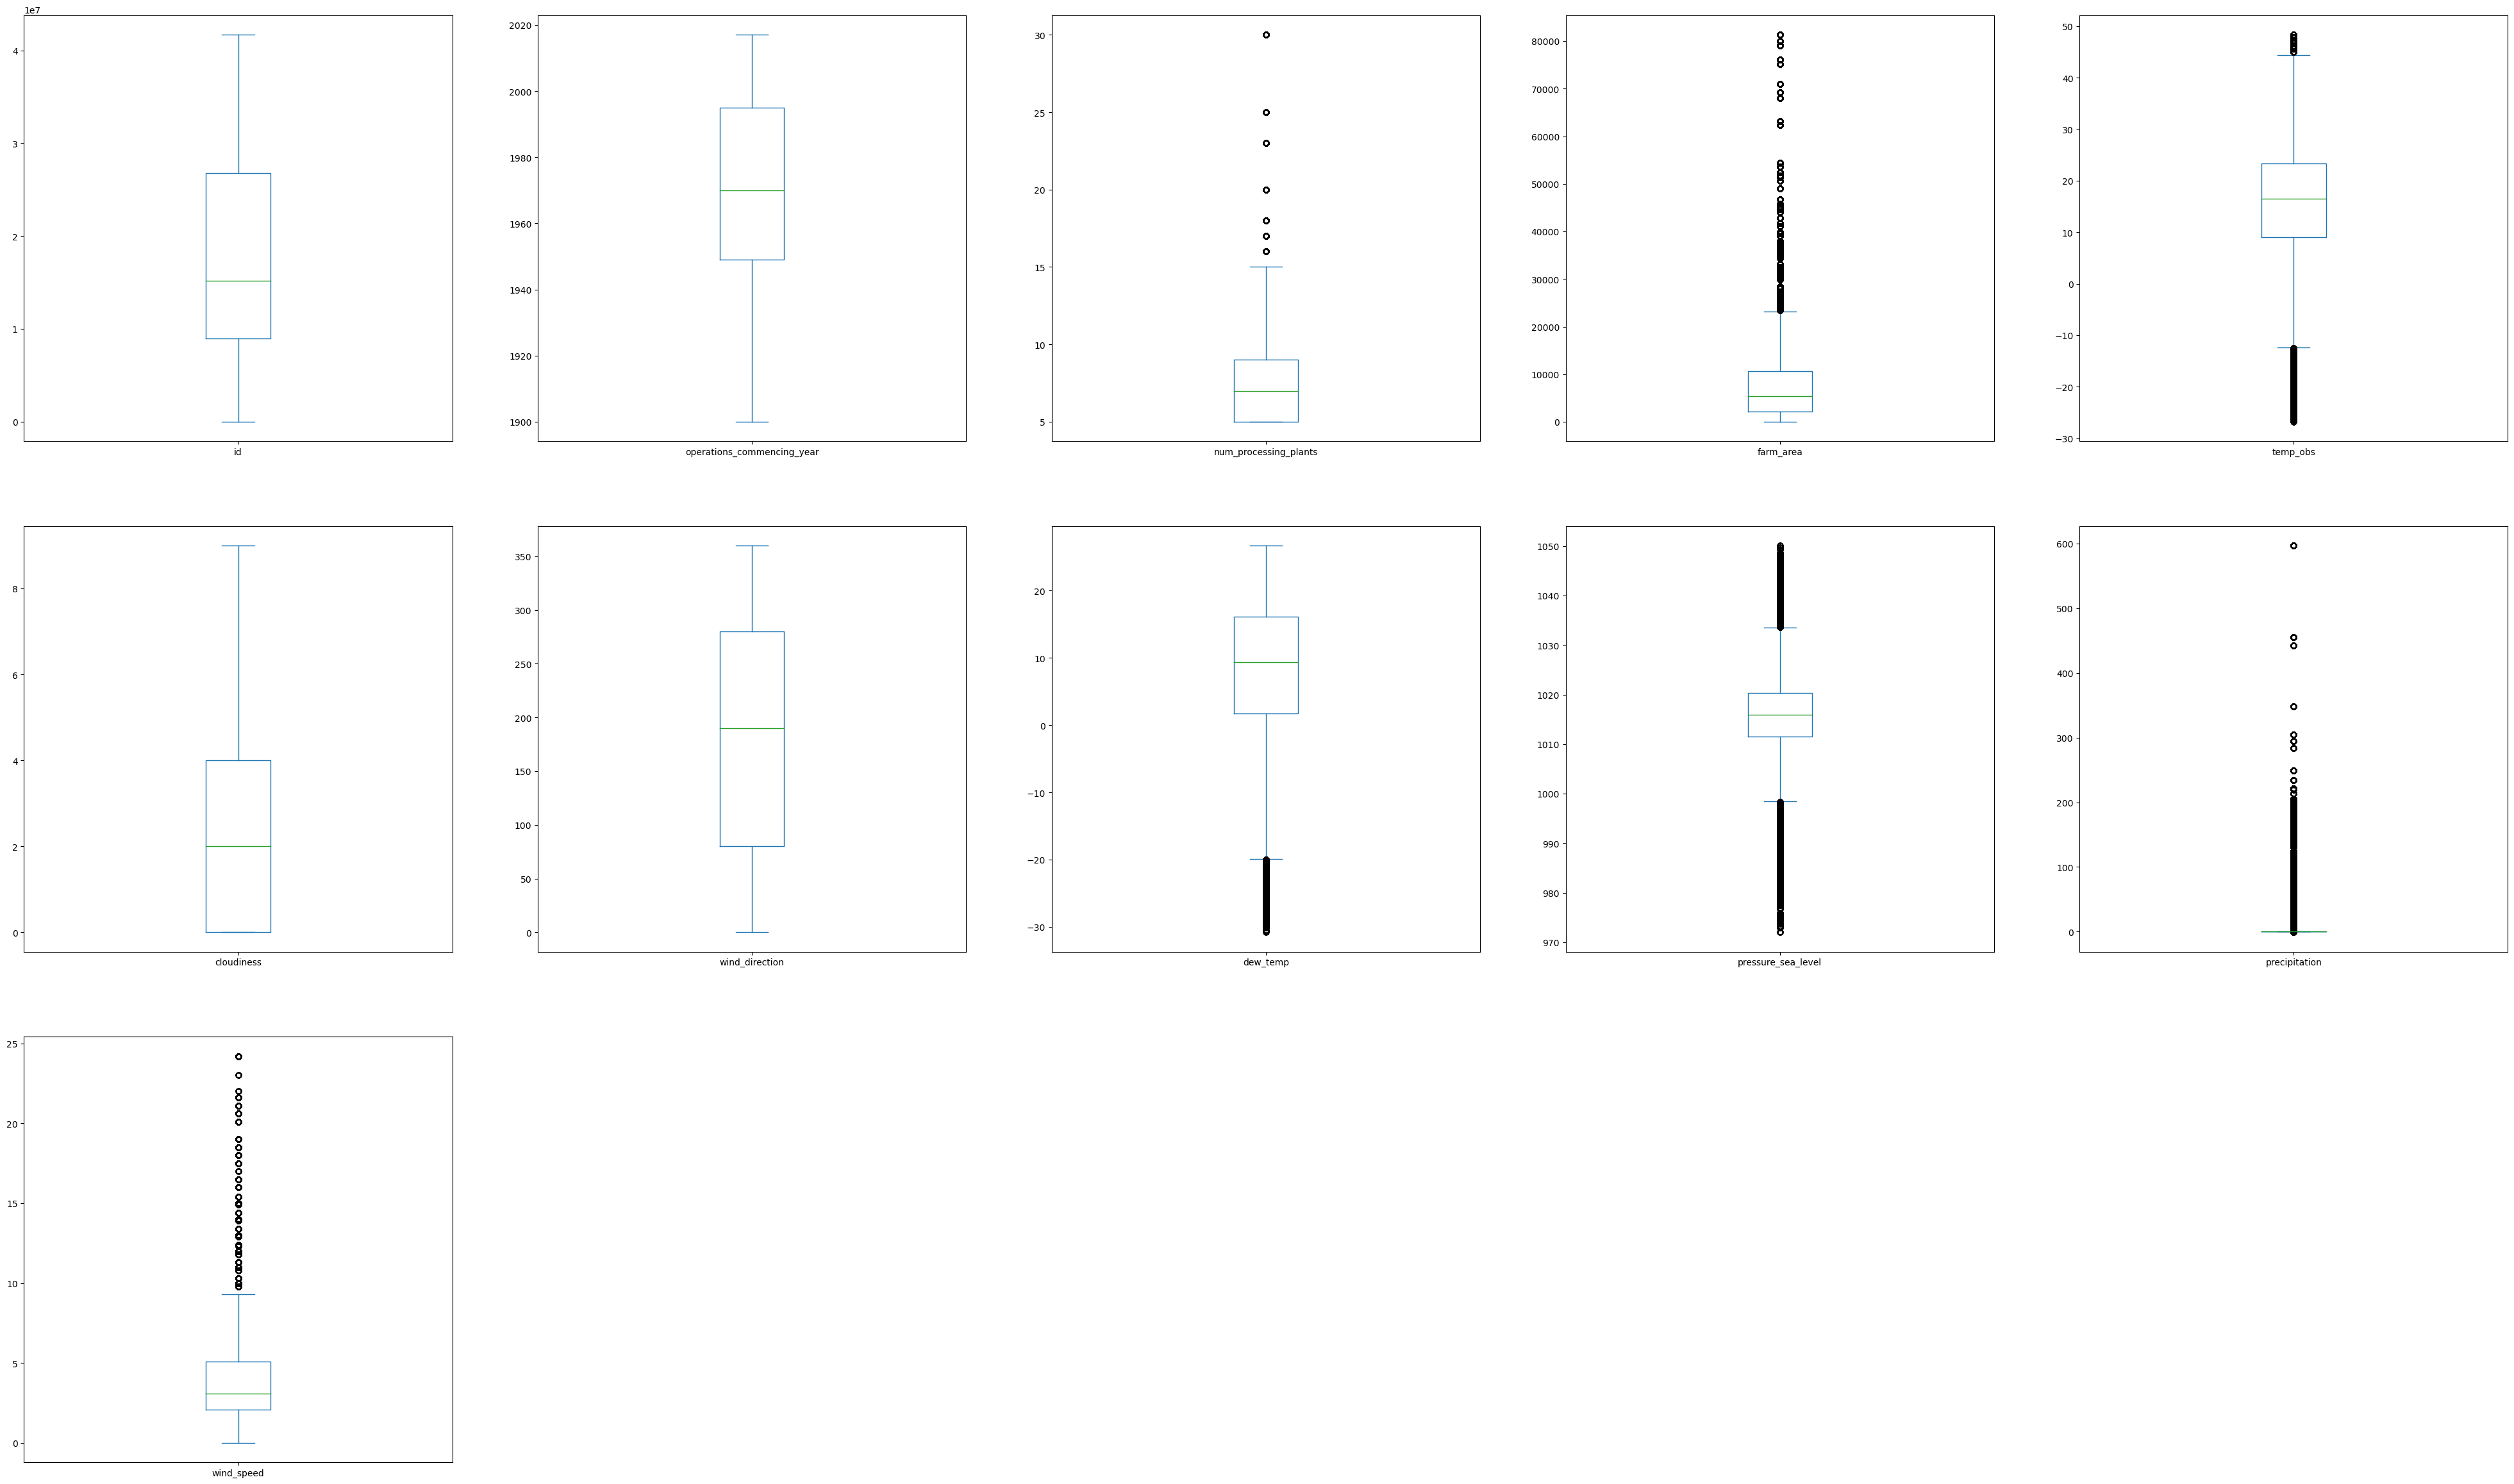

In [ ]:
test.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

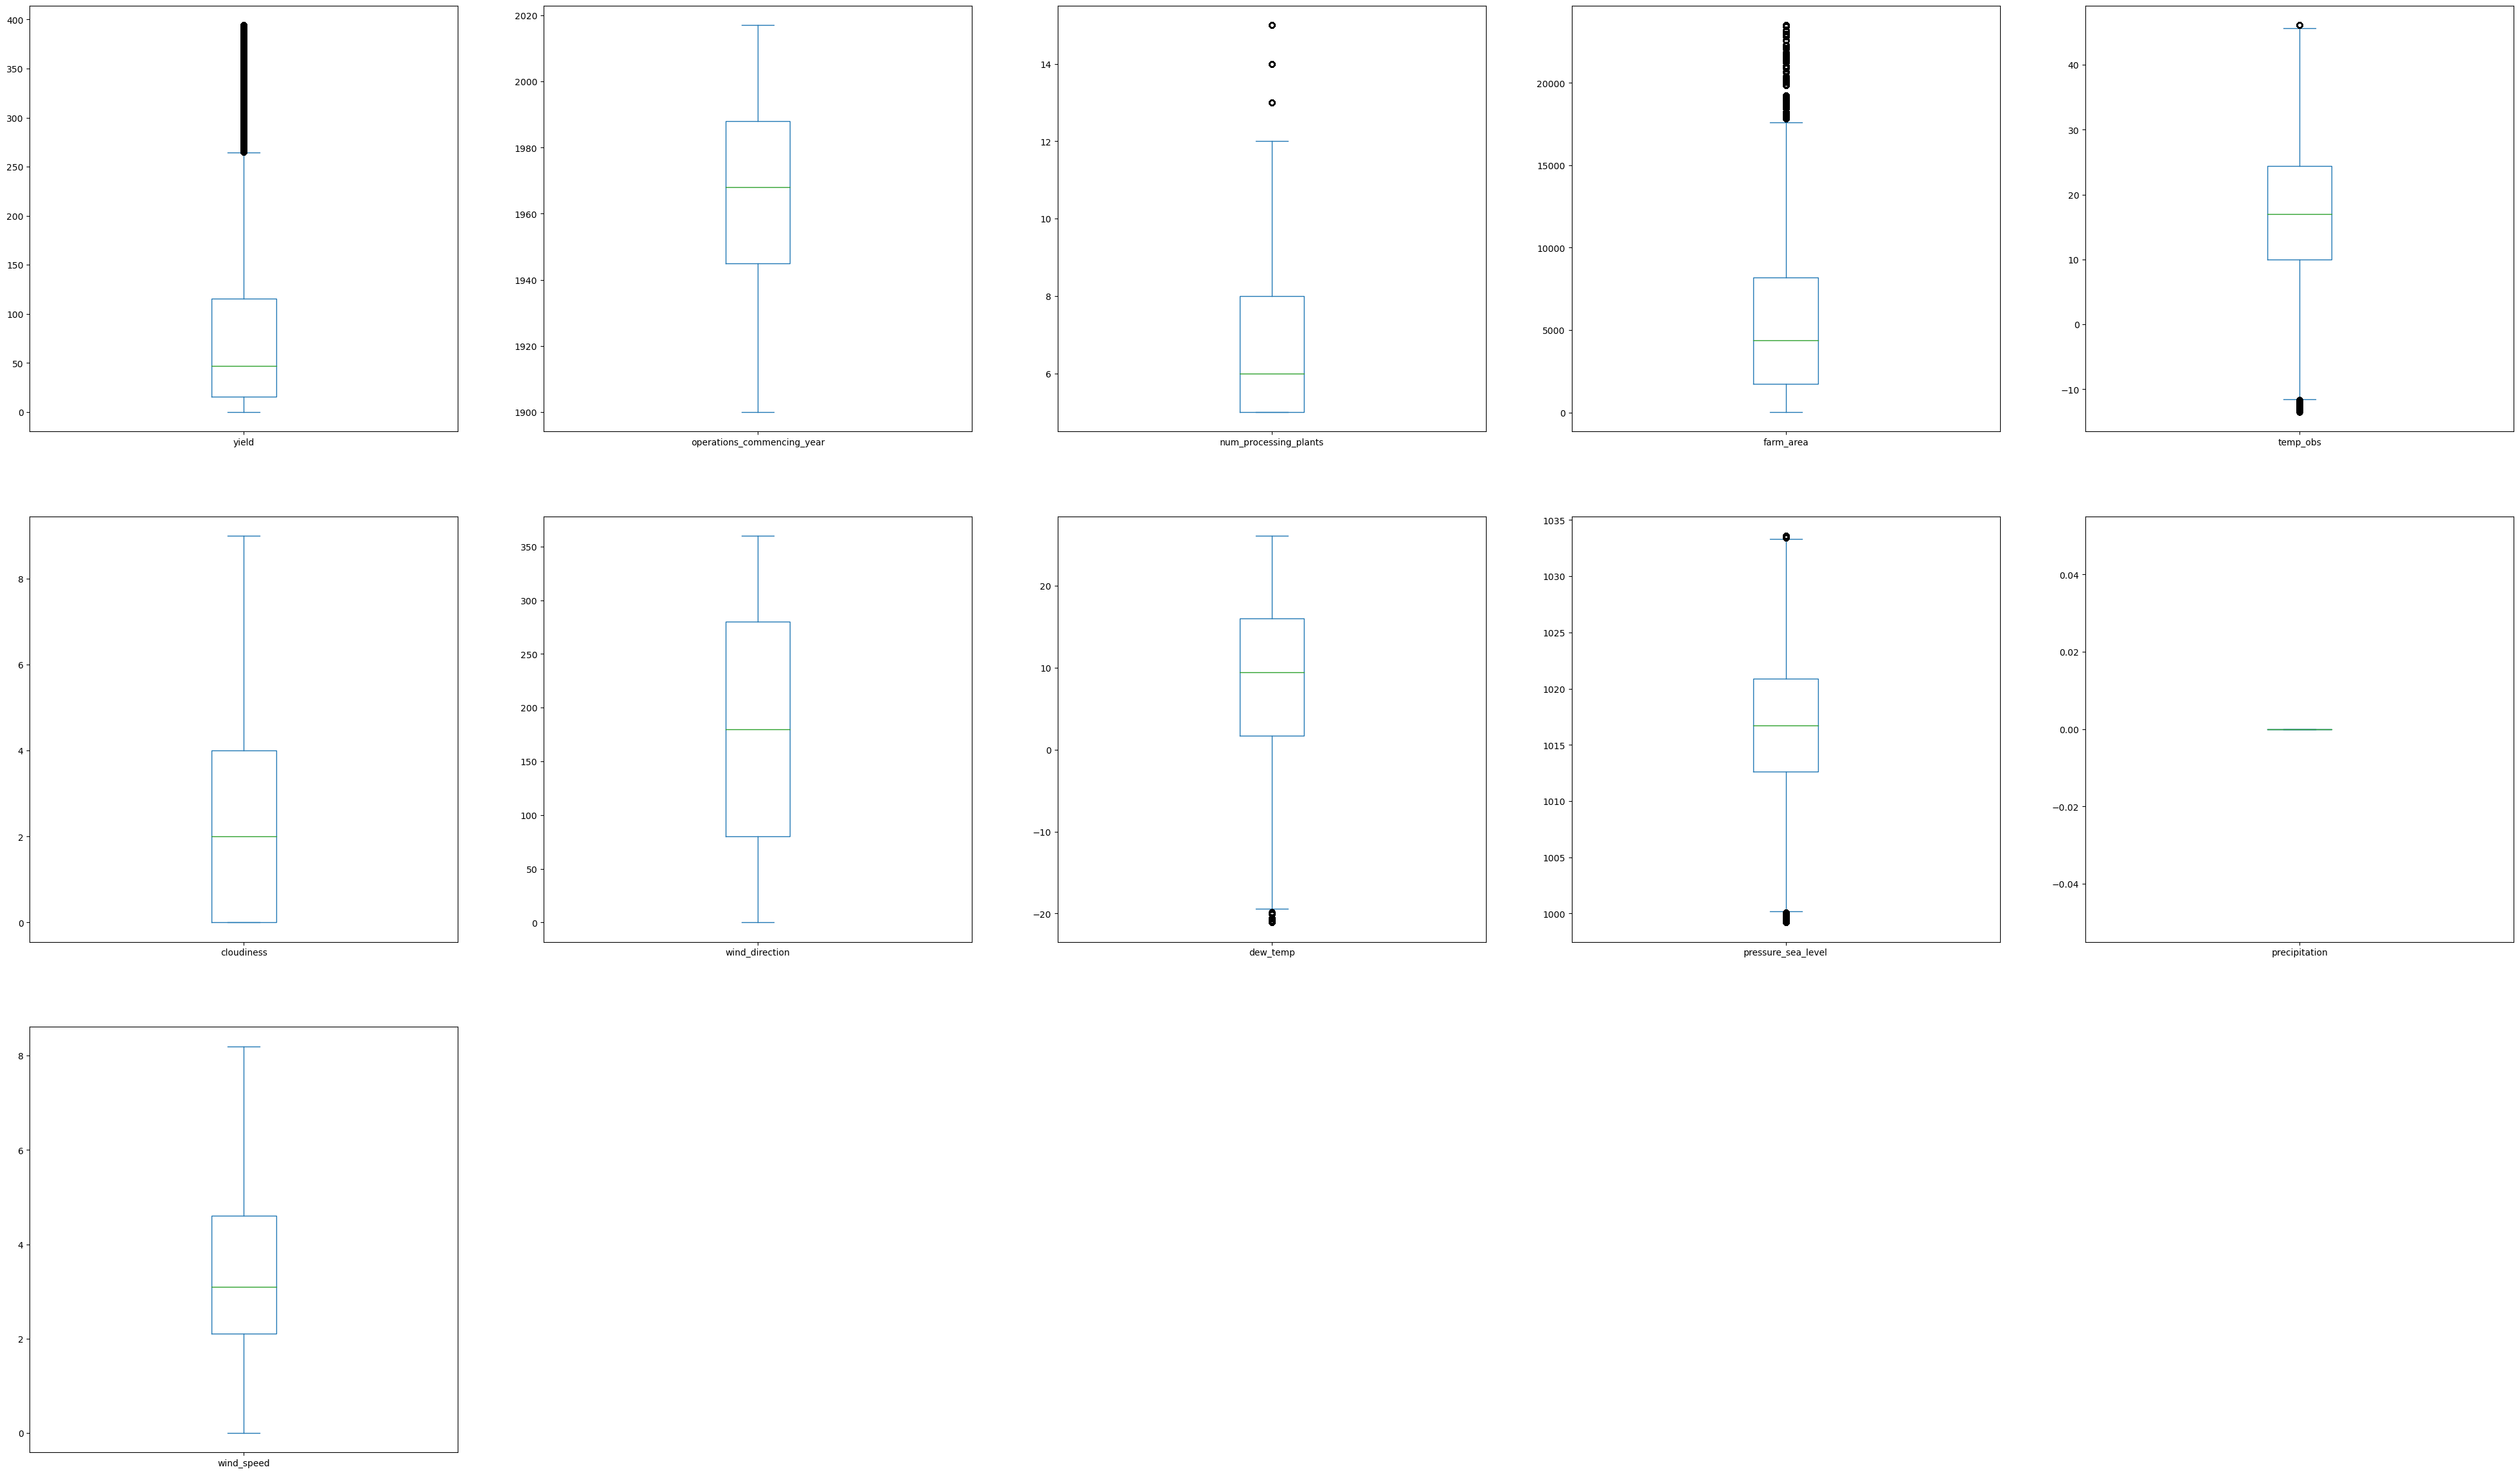

In [ ]:
cols=['num_processing_plants','farm_area','dew_temp','temp_obs','pressure_sea_level','precipitation','wind_speed']
q1=test_df[cols].quantile(0.25)
q3=test_df[cols].quantile(0.75)
iqr=q3-q1
test_df_box=test[~((test[cols]<(q1 -1.5*iqr)) |(test[cols]>(q3 +1.5*iqr))).any(axis=1)]
train_df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(50,50))
plt.show()

Seperating the numerical and categorical columns

In [ ]:
numeric_test=test._get_numeric_data()                             
numeric_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12599384 entries, 0 to 21154794
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   operations_commencing_year  float64
 2   num_processing_plants       float64
 3   farm_area                   float64
 4   temp_obs                    float64
 5   cloudiness                  float64
 6   wind_direction              float64
 7   dew_temp                    float64
 8   pressure_sea_level          float64
 9   precipitation               float64
 10  wind_speed                  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 GB


In [ ]:
numeric_test.columns

Index(['id', 'operations_commencing_year', 'num_processing_plants',
       'farm_area', 'temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed'],
      dtype='object')

In [ ]:
numeric_test.isnull().sum()

id                                  0
operations_commencing_year    6675329
num_processing_plants         9436880
farm_area                           0
temp_obs                         4834
cloudiness                    5707340
wind_direction                 643627
dew_temp                        17040
pressure_sea_level            1045186
precipitation                 2510652
wind_speed                      24454
dtype: int64

In [ ]:
cat_test=test_df.drop(numeric_test,axis=1)
cat_test.info

<bound method DataFrame.info of                          date     farm_id ingredient_type farming_company  \
0         2017-01-01 00:00:00  fid_110884           ing_w     Obery Farms   
1         2017-01-01 00:00:00   fid_90053           ing_w     Obery Farms   
2         2017-01-01 00:00:00   fid_17537           ing_w     Obery Farms   
3         2017-01-01 00:00:00  fid_110392           ing_w     Obery Farms   
4         2017-01-01 00:00:00   fid_62402           ing_w     Obery Farms   
...                       ...         ...             ...             ...   
21154792  2017-12-31 23:00:00   fid_58769           ing_x     Obery Farms   
21154793  2017-12-31 23:00:00   fid_58769           ing_z     Obery Farms   
21154794  2017-12-31 23:00:00  fid_117010           ing_w     Obery Farms   
21154795  2017-12-31 23:00:00  fid_117010           ing_x     Obery Farms   
21154796  2017-12-31 23:00:00  fid_117010           ing_z     Obery Farms   

         deidentified_location  
0         

In [ ]:
numeric_impute=['operations_commencing_year', 'num_processing_plants',
       'farm_area', 'temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed']

imputing null values by using simple imputer.

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='median')
m=im.fit_transform(numeric_test[numeric_impute])

In [ ]:
numeric_test[numeric_impute]=m
numeric_test.head()


,id,operations_commencing_year,num_processing_plants,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,0,2008.0,7.0,690.455096,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
1,1,2004.0,7.0,252.696160,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
2,2,1991.0,7.0,499.446528,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
3,3,2002.0,7.0,2200.407555,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
4,4,1975.0,7.0,10833.140121,17.8,4.0,100.0,11.7,1021.4,0.0,3.6


In [ ]:
numeric_test.isnull().sum()

id                            0
operations_commencing_year    0
num_processing_plants         0
farm_area                     0
temp_obs                      0
cloudiness                    0
wind_direction                0
dew_temp                      0
pressure_sea_level            0
precipitation                 0
wind_speed                    0
dtype: int64

concatinating cat_test and Numeric_test data frames.

In [ ]:
df_test=pd.concat([cat_test,numeric_test],join='inner',axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12599384 entries, 0 to 21154794
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   farming_company             object 
 4   deidentified_location       object 
 5   id                          int64  
 6   operations_commencing_year  float64
 7   num_processing_plants       float64
 8   farm_area                   float64
 9   temp_obs                    float64
 10  cloudiness                  float64
 11  wind_direction              float64
 12  dew_temp                    float64
 13  pressure_sea_level          float64
 14  precipitation               float64
 15  wind_speed                  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.6+ GB


Feature Engineering

Droping un necessary columns

In [ ]:
 df_test.drop(columns=['operations_commencing_year','num_processing_plants','farming_company','deidentified_location','farm_id','ingredient_type'],axis=1,inplace=True)


In [ ]:
df_test.head()

,date,id,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,0,690.455096,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
1,2017-01-01 00:00:00,1,252.696160,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
2,2017-01-01 00:00:00,2,499.446528,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
3,2017-01-01 00:00:00,3,2200.407555,17.8,4.0,100.0,11.7,1021.4,0.0,3.6
4,2017-01-01 00:00:00,4,10833.140121,17.8,4.0,100.0,11.7,1021.4,0.0,3.6


Extracing and Year,Month,Day from the date column.

In [ ]:
df_test['date'] = pd.to_datetime(df_test['date'],infer_datetime_format=True)# changing data dtype to datatime64
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test.head()

,date,id,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day
0,2017-01-01,0,690.455096,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,2017,1,1
1,2017-01-01,1,252.696160,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,2017,1,1
2,2017-01-01,2,499.446528,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,2017,1,1
3,2017-01-01,3,2200.407555,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,2017,1,1
4,2017-01-01,4,10833.140121,17.8,4.0,100.0,11.7,1021.4,0.0,3.6,2017,1,1


Reducing the memory

i.e float64 to float32.

In [ ]:
df_test['wind_speed']=df_test['wind_speed'].astype('float32')
df_test['cloudiness']=df_test['cloudiness'].astype('float32')
df_test['wind_direction']=df_test['wind_direction'].astype('float32')
df_test['dew_temp']=df_test['dew_temp'].astype('float32')
df_test['pressure_sea_level']=df_test['pressure_sea_level'].astype('float32')
df_test['precipitation']=df_test['precipitation'].astype('float32')
df_test['farm_area']=df_test['farm_area'].astype('float32')
df_test['temp_obs']=df_test['temp_obs'].astype('float32')
df_test['month']=df_test['month'].astype('int8')
df_test['day']=df_test['day'].astype('int8')
df_test.head()

,date,id,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day
0,2017-01-01,0,690.455078,17.799999,4.0,100.0,11.7,1021.400024,0.0,3.6,2017,1,1
1,2017-01-01,1,252.696167,17.799999,4.0,100.0,11.7,1021.400024,0.0,3.6,2017,1,1
2,2017-01-01,2,499.446533,17.799999,4.0,100.0,11.7,1021.400024,0.0,3.6,2017,1,1
3,2017-01-01,3,2200.407471,17.799999,4.0,100.0,11.7,1021.400024,0.0,3.6,2017,1,1
4,2017-01-01,4,10833.139648,17.799999,4.0,100.0,11.7,1021.400024,0.0,3.6,2017,1,1


Scalling the test data by using MIXMAX Scaler.

In [ ]:
df_test_scale=[  'farm_area', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed','dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_test[df_test_scale])
scaled_test_data = scaler.transform(df_test[df_test_scale])

In [ ]:
df_test[df_test_scale]=scaled_test_data
df_test.head()

,date,id,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day
0,2017-01-01,0,0.008173,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
1,2017-01-01,1,0.002786,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
2,2017-01-01,2,0.005822,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
3,2017-01-01,3,0.026754,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
4,2017-01-01,4,0.132985,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1


In [ ]:
df_test.head()

,date,id,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day
0,2017-01-01,0,0.008173,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
1,2017-01-01,1,0.002786,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
2,2017-01-01,2,0.005822,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
3,2017-01-01,3,0.026754,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1
4,2017-01-01,4,0.132985,0.593875,0.444444,0.277778,0.73913,0.632524,0.001672,0.14876,2017,1,1


saving "df_test to model_test_data.csv" to use in modeling

In [ ]:
df_test.to_csv("model_test_data.csv", index=False)